In [17]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.figure import Figure

In [18]:
import os
import time
import pandas as pd
from pandas import read_csv
import tools_leprecon as tools

In [19]:
# edit day and two spectrum name.
day = "20201016"
name0 = "chamber_H2_on_0.5A_100ms_darkroom"
name1 = "chamber_H2_off_0.5A_100ms_darkroom"
# day = "20201005"
# name0 = "standard_H2_on_5000ms_darkroom"
# name1 = "standard_H2_off_5000ms_darkroom"

# don't edit
data_dir = "\\\\10.249.254.51\Public\BACK_UP\miura_backup\data\spectrum"
two_spec_pngname = name0.replace('on', 'on&off')
sub_spec_pngname = name0.replace('on', 'on-off')
fpth0 = data_dir + "\\" + day + "\\" + name0 + ".txt"
fpth1 = data_dir + "\\" + day + "\\" + name1 + ".txt"
data0 = read_csv(fpth0, sep=";", skiprows=66)
data1 = read_csv(fpth1, sep=";", skiprows=66)
# print(data0)
data0["Wavelength"] = pd.to_numeric(data0["Wavelength"], errors="coerce")
data1["Wavelength"] = pd.to_numeric(data1["Wavelength"], errors="coerce")
subtract_rawdata = data0.loc[:, "Raw data #1"] - data1.loc[:, "Raw data #1"]
# print(subtract_rawdata)

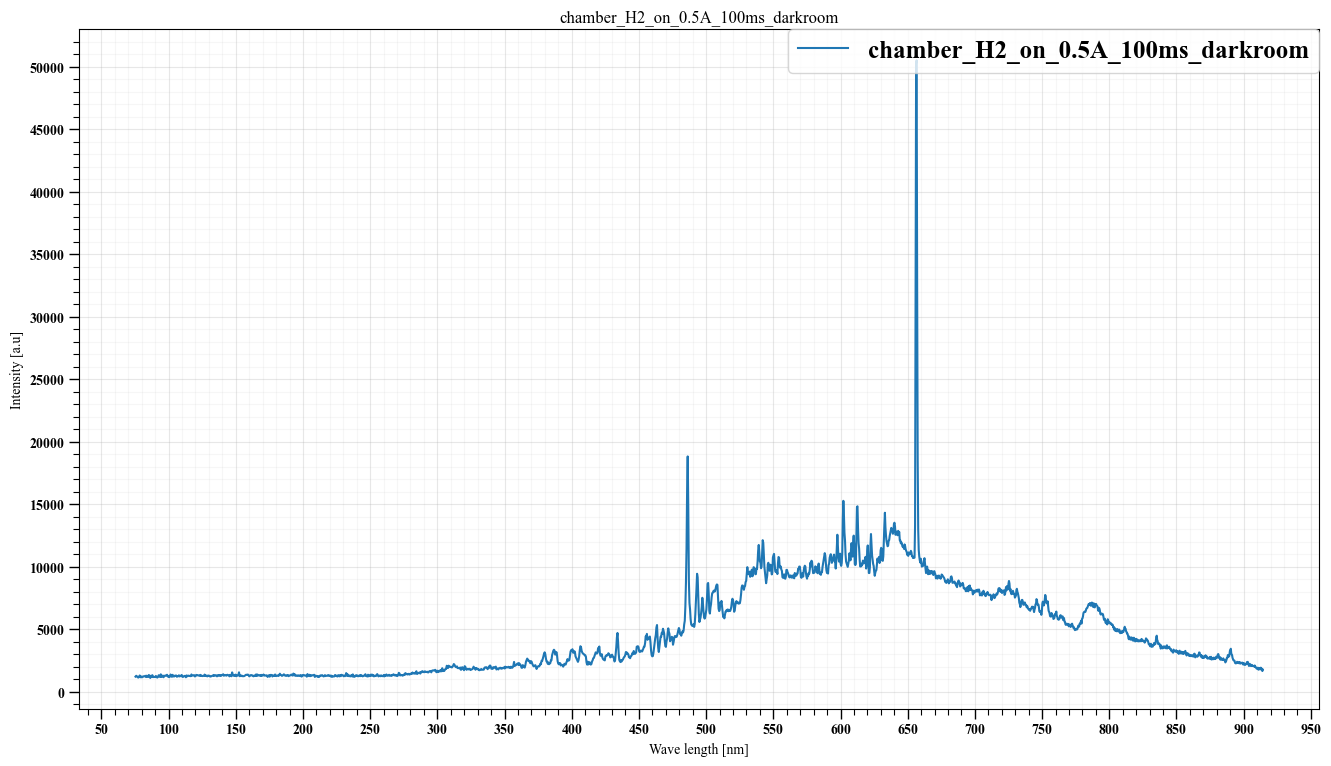

In [20]:
# plot first data
fig = plt.figure(figsize=(16, 9), dpi=100)
ax1 = fig.add_subplot(111, title=name0, xlabel="Wave length [nm]", ylabel="Intensity [a.u]")
ax1.plot(data0["Wavelength"], data0["Raw data #1"], '-')
ax1.legend([name0, name1], bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=18)
tools.ticks_visual(ax1)
tools.grid_visual(ax1)
tools.gritix()
tools.font_setup(family='Times New Roman', weight='heavy', size=18)
ax1.xaxis.set_major_locator(mpl.ticker.MultipleLocator(50))
ax1.yaxis.set_major_locator(mpl.ticker.MultipleLocator(5000))
plt.savefig((data_dir + "\\" + day + "\\" + name0 + ".png"), bbox_to_inches="tight")

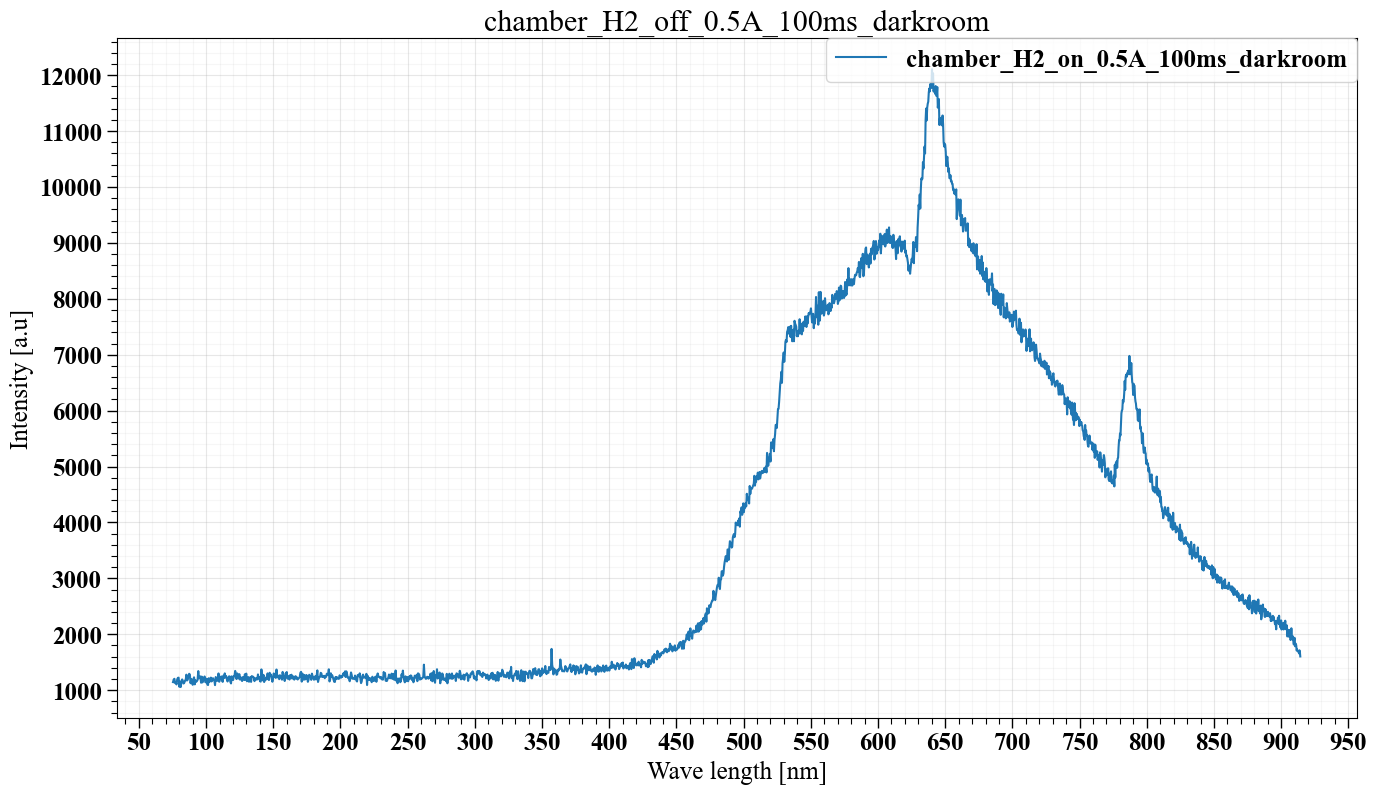

In [21]:
# plot second data
fig = plt.figure(figsize=(16, 9), dpi=100)
ax1 = fig.add_subplot(111, title=name1, xlabel="Wave length [nm]", ylabel="Intensity [a.u]")
ax1.plot(data1["Wavelength"], data1["Raw data #1"],"-")
ax1.legend([name0, name1], bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=18)
tools.ticks_visual(ax1)
tools.grid_visual(ax1)
tools.gritix()
tools.font_setup(family='Times New Roman', weight='heavy', size=18)
ax1.xaxis.set_major_locator(mpl.ticker.MultipleLocator(50))
ax1.yaxis.set_major_locator(mpl.ticker.MultipleLocator(1000))
plt.savefig((data_dir + "\\" + day + "\\" + name1 + ".png"), bbox_to_inches="tight")

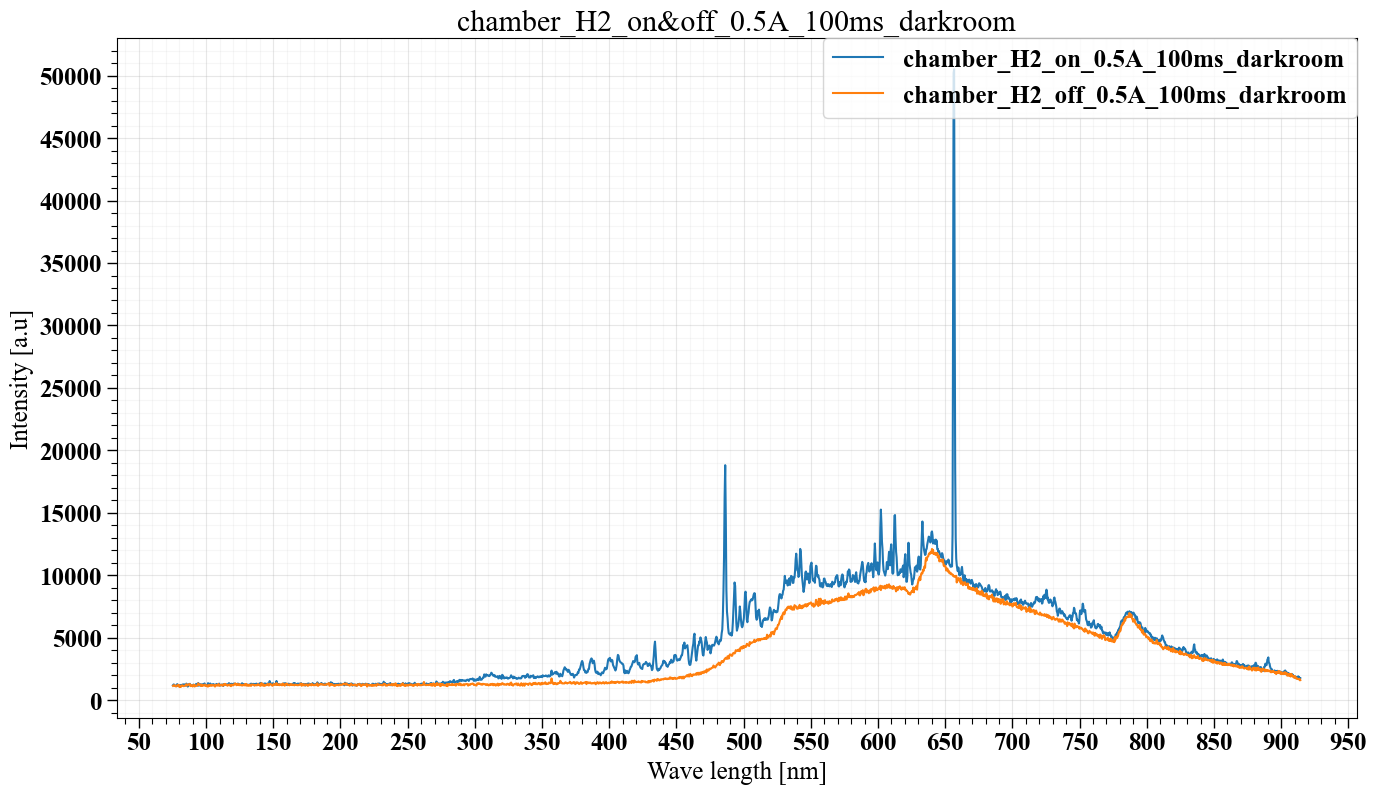

In [22]:
# plot first and second data
fig = plt.figure(figsize=(16, 9), dpi=100)
ax1 = fig.add_subplot(111, title=two_spec_pngname, xlabel="Wave length [nm]", ylabel="Intensity [a.u]")
ax1.plot(data0["Wavelength"], data0["Raw data #1"], '-')
ax1.plot(data1["Wavelength"], data1["Raw data #1"],"-")
ax1.legend([name0, name1], bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=18)
tools.ticks_visual(ax1)
tools.grid_visual(ax1)
tools.gritix()
tools.font_setup(family='Times New Roman', weight='heavy', size=18)
ax1.xaxis.set_major_locator(mpl.ticker.MultipleLocator(50))
ax1.yaxis.set_major_locator(mpl.ticker.MultipleLocator(5000))
plt.savefig((data_dir + "\\" + day + "\\" + two_spec_pngname + ".png"), bbox_to_inches="tight")

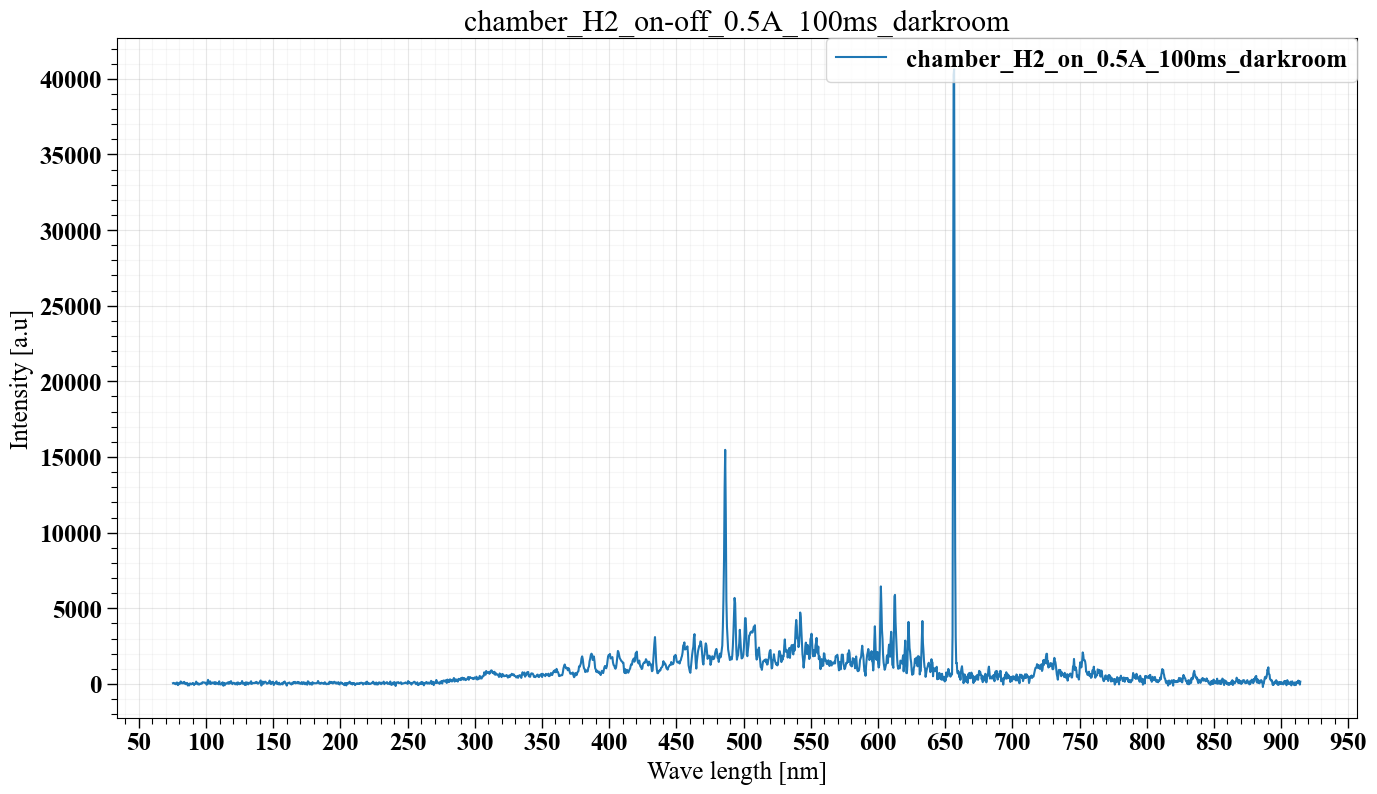

In [23]:
# plot subtract data
fig = plt.figure(figsize=(16, 9), dpi=100)
ax1 = fig.add_subplot(111, title=sub_spec_pngname, xlabel="Wave length [nm]", ylabel="Intensity [a.u]")
plt.plot(data0["Wavelength"], subtract_rawdata,"-")
ax1.legend([name0, name1], bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=18)
tools.ticks_visual(ax1)
tools.grid_visual(ax1)
tools.gritix()
tools.font_setup(family='Times New Roman', weight='heavy', size=18)
ax1.xaxis.set_major_locator(mpl.ticker.MultipleLocator(50))
ax1.yaxis.set_major_locator(mpl.ticker.MultipleLocator(5000))
plt.savefig((data_dir + "\\" + day + "\\" + sub_spec_pngname + ".png"), bbox_to_inches="tight")

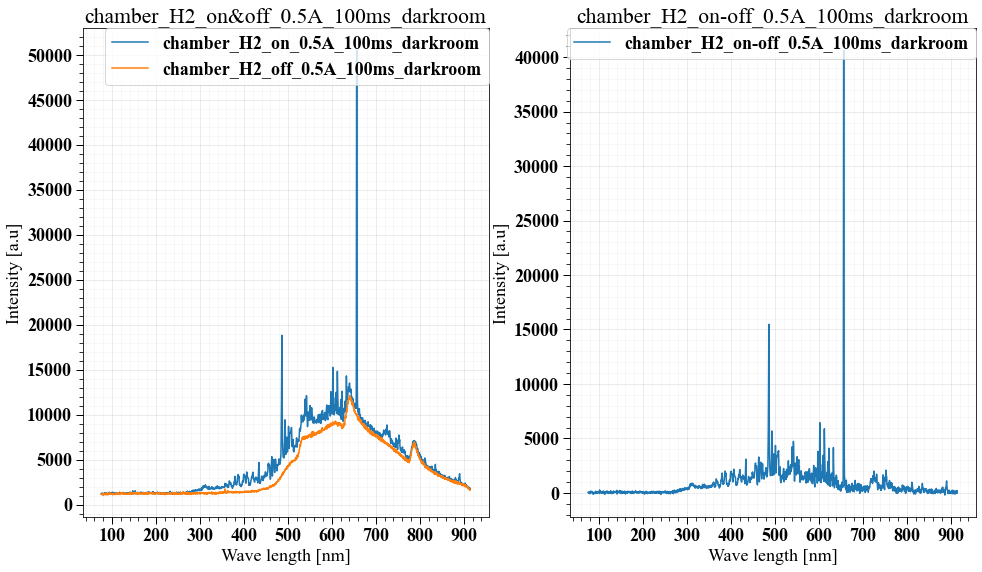

In [24]:
# plot first&second and subtract data
fig = plt.figure()
fig.set_size_inches(16,9)

ax1 = fig.add_subplot(121, title=two_spec_pngname, xlabel="Wave length [nm]", ylabel="Intensity [a.u]")
ax1.plot(data0["Wavelength"], data0["Raw data #1"], '-')
ax1.plot(data1["Wavelength"], data1["Raw data #1"],"-")
ax1.legend([name0, name1], bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=18)
tools.ticks_visual(ax1)
tools.grid_visual(ax1)
tools.gritix()
tools.font_setup(family='Times New Roman', weight='heavy', size=18)
ax1.xaxis.set_major_locator(mpl.ticker.MultipleLocator(100))
ax1.yaxis.set_major_locator(mpl.ticker.MultipleLocator(5000))

ax2 = fig.add_subplot(122, title=sub_spec_pngname, xlabel="Wave length [nm]", ylabel="Intensity [a.u]")
ax2.plot(data0["Wavelength"], subtract_rawdata,"-")
ax2.legend([sub_spec_pngname], bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=18)
tools.ticks_visual(ax2)
tools.grid_visual(ax2)
tools.gritix()
tools.font_setup(family='Times New Roman', weight='heavy', size=18)
ax2.xaxis.set_major_locator(mpl.ticker.MultipleLocator(100))
ax2.yaxis.set_major_locator(mpl.ticker.MultipleLocator(5000))